In [1]:
import keras 


Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
import xgboost as xgb

In [4]:
data= pd.read_csv("C://Users/Abhishek Parashar//Desktop//.ipynb_checkpoints//Training Data.csv")

In [5]:
data.head()

,bekaar,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
1,2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
2,3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
3,4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0
4,5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,6,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335006 entries, 0 to 335005
Data columns (total 42 columns):
bekaar              335006 non-null int64
HR                  313749 non-null float64
O2Sat               299052 non-null float64
Temp                114831 non-null float64
SBP                 287644 non-null float64
MAP                 305231 non-null float64
DBP                 176498 non-null float64
Resp                306696 non-null float64
EtCO2               0 non-null float64
BaseExcess          35086 non-null float64
HCO3                26215 non-null float64
FiO2                46993 non-null float64
pH                  38671 non-null float64
PaCO2               29468 non-null float64
SaO2                17178 non-null float64
AST                 4877 non-null float64
BUN                 26564 non-null float64
Alkalinephos        4736 non-null float64
Calcium             16490 non-null float64
Chloride            27154 non-null float64
Creatinine          21657 non

In [7]:
from scipy import stats


In [16]:
# df.drop('EtCO2',axis=1,inplace=True)

In [15]:
#df.drop('bekaar',axis=1,inplace=True)

In [17]:
F,p=stats.f_oneway(df)
### anova

In [8]:
from pylab import rcParams

In [9]:
missing = (data.isnull().sum() / data.shape[0]) * 100
missing

bekaar                0.000000
HR                    6.345259
O2Sat                10.732345
Temp                 65.722703
SBP                  14.137657
MAP                   8.887901
DBP                  47.314973
Resp                  8.450595
EtCO2               100.000000
BaseExcess           89.526755
HCO3                 92.174767
FiO2                 85.972490
pH                   88.456625
PaCO2                91.203740
SaO2                 94.872331
AST                  98.544205
BUN                  92.070590
Alkalinephos         98.586294
Calcium              95.077700
Chloride             91.894474
Creatinine           93.535340
Bilirubin_direct     99.852241
Glucose              87.693653
Lactate              96.555286
Magnesium            92.206707
Phosphate            94.983373
Potassium            89.153030
Bilirubin_total      98.810171
TroponinI            99.870749
Hct                  88.292448
Hgb                  91.332991
PTT                  95.382172
WBC     

Text(0.5, 1.0, 'missing data percentage')

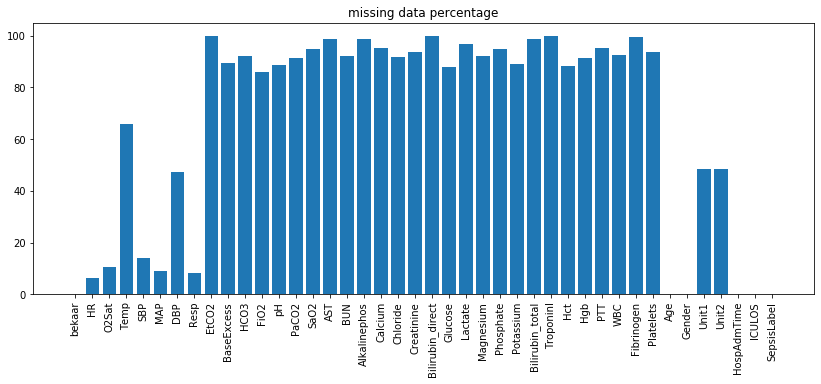

In [10]:
rcParams['figure.figsize'] = 14, 5
_ = plt.bar(missing.index, missing)
_ = plt.xticks(missing.index, rotation=90)


plt.title("missing data percentage")

In [11]:

selected_cols = list(missing[missing < 90].index)
selected_cols

['bekaar',
 'HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'BaseExcess',
 'FiO2',
 'pH',
 'Glucose',
 'Potassium',
 'Hct',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel']

In [12]:

fdata = data[selected_cols]
fdata.head()

,bekaar,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,...,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
1,2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
2,3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,24.0,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
3,4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,0.28,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0
4,5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,6,0


In [13]:
categorical = fdata.dtypes == object
categorical['Unit1'] = True
categorical['Unit2'] = True
categorical['Gender'] = True

In [14]:
cat_vars = list(categorical[categorical].index)
cont_vars = list(categorical[~categorical].index)
cont_vars.pop(-1)

'SepsisLabel'

In [15]:
import seaborn as sns

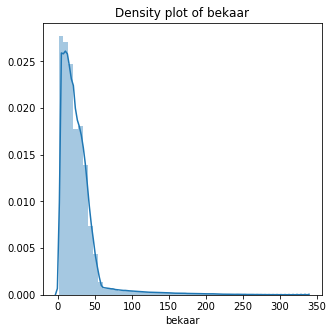

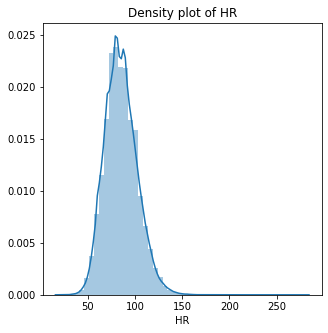

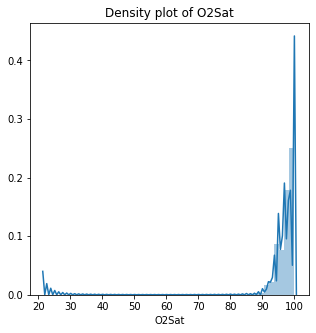

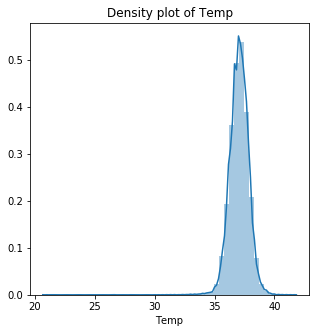

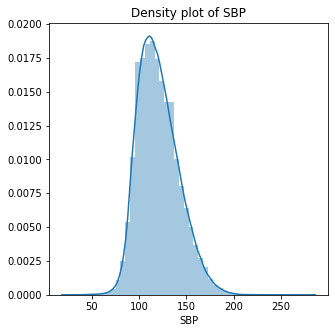

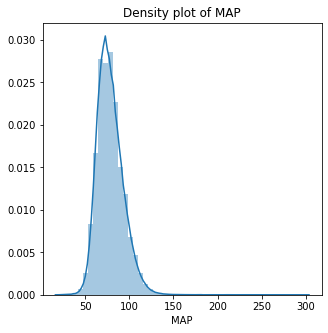

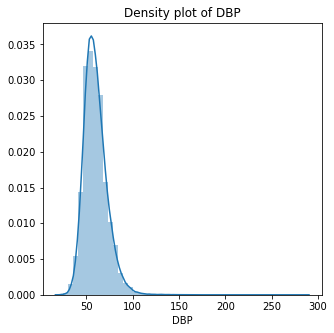

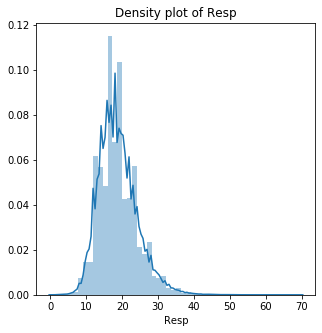

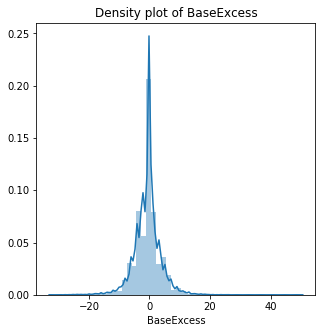

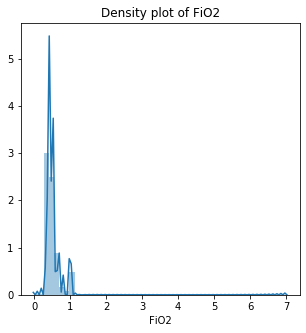

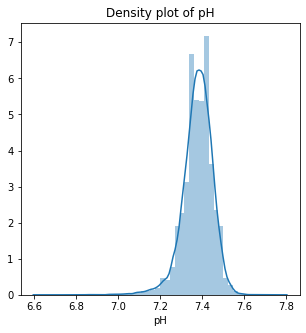

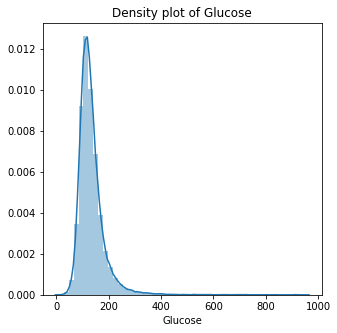

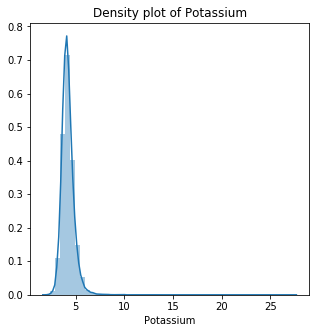

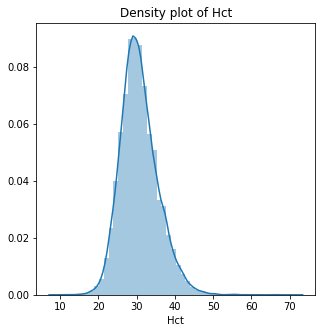

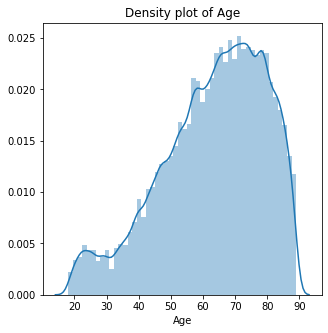

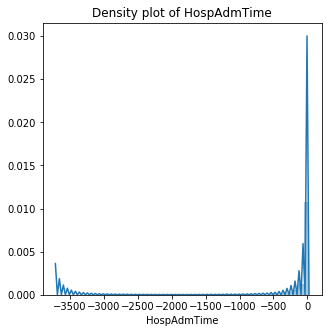

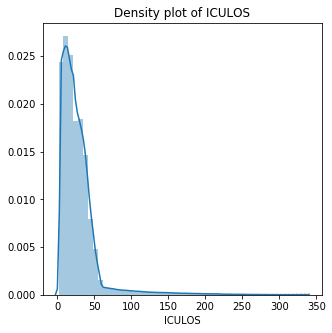

In [16]:
rcParams['figure.figsize'] = 5, 5
for i,var in enumerate(cont_vars):
    plt.figure(i)
    plt.title("Density plot of " + str(var))
    sns.distplot(fdata[var].dropna(), axlabel=var);

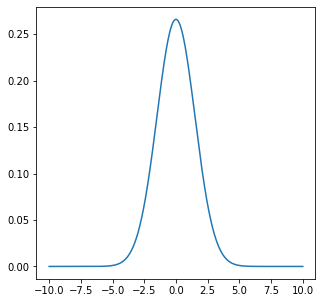

In [17]:
x = np.linspace(start=-10, stop=10, num=1000)
y = stats.norm.pdf(x, loc=0, scale=1.5) 
plt.plot(x, y)

In [18]:
data1=data.HR

C:\Users\Abhishek Parashar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Abhishek Parashar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


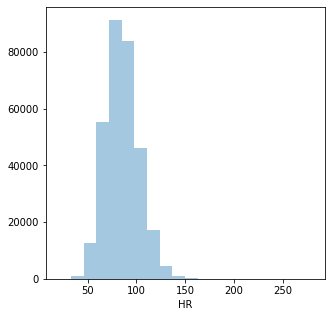

In [19]:
sns.distplot(data1, bins=20, kde=False)


In [20]:
data1=data.Bilirubin_direct

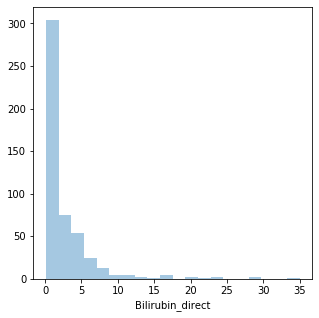

In [21]:
sns.distplot(data1, bins=20, kde=False)

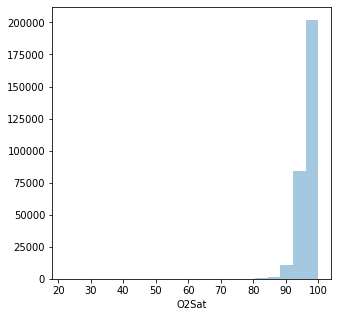

In [22]:
data1=data.O2Sat
sns.distplot(data1, bins=20, kde=False)

In [23]:
class Gaussian:
    "Model univariate Gaussian"
    def __init__(self, mu, sigma):
        
        self.mu = mu
        self.sigma = sigma
    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y
    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)

In [24]:
data1=data.HR
best_single = Gaussian(np.mean(data1), np.std(data1))
print('Best single Gaussian: μ = {:.2}, σ = {:.2}'.format(best_single.mu, best_single.sigma))

Best single Gaussian: μ = 8.5e+01, σ = 1.7e+01


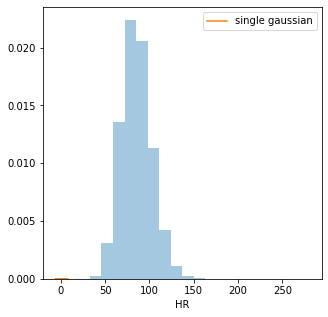

In [25]:
x = np.linspace(-6, 8, 200)
g_single = stats.norm(best_single.mu, best_single.sigma).pdf(x)
sns.distplot(data1, bins=20, kde=False, norm_hist=True)
plt.plot(x, g_single, label='single gaussian')
plt.legend();

In [26]:
fdata.loc[(fdata['Temp'] >= 36.4) & (fdata['Temp'] < 37.6),'data'] = 'sahi'
fdata.loc[(fdata['Temp'] < 36.4) | (fdata['Temp'] >= 37.6),'tapmaan'] = 'kharabh'
fdata['tapmaan'].fillna('ptanhi', inplace=True)

C:\Users\Abhishek Parashar\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Abhishek Parashar\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Abhishek Parashar\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

In [27]:

fdata.loc[(fdata['HR'] >= 100) & (fdata['Age'] >= 10 ),'dhadhkan'] = 'kharabh'
fdata.loc[(data['HR'] < 100) & (fdata['HR'] > 60) & (fdata['Age'] >= 10 ),'dhadhkan'] = 'sahi'
fdata.loc[(data['HR'] >= 70) & (fdata['HR'] < 190) & (fdata['Age'] < 10 ),'dhadhkan'] = 'sahi'
fdata.loc[((fdata['HR'] < 70) | (fdata['HR'] >= 190)) & (fdata['Age'] < 10 ),'dhadhkan'] = 'kharabh'
fdata['dhadhkan'].fillna('ptanhi', inplace=True)

In [28]:
fdata.head()

,bekaar,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,...,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,data,tapmaan,dhadhkan
0,1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,...,83.14,0,NaN,NaN,-0.03,2,0,NaN,ptanhi,sahi
1,2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,...,83.14,0,NaN,NaN,-0.03,3,0,NaN,ptanhi,sahi
2,3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,24.0,NaN,...,83.14,0,NaN,NaN,-0.03,4,0,NaN,ptanhi,sahi
3,4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,0.28,...,83.14,0,NaN,NaN,-0.03,5,0,NaN,ptanhi,kharabh
4,5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,83.14,0,NaN,NaN,-0.03,6,0,NaN,ptanhi,kharabh


In [29]:
fdata.loc[(fdata['O2Sat'] >= 90) & (fdata['O2Sat'] < 100),'o2stat'] = 'sahi'
fdata.loc[(fdata['O2Sat'] < 90) & (fdata['O2Sat'] >= 0),'o2stat'] = 'kharabh'
fdata['o2stat'].fillna('ptanhi', inplace=True)

In [30]:

fdata.head()

,bekaar,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,...,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,data,tapmaan,dhadhkan,o2stat
0,1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,...,0,NaN,NaN,-0.03,2,0,NaN,ptanhi,sahi,sahi
1,2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,...,0,NaN,NaN,-0.03,3,0,NaN,ptanhi,sahi,sahi
2,3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,24.0,NaN,...,0,NaN,NaN,-0.03,4,0,NaN,ptanhi,sahi,sahi
3,4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,0.28,...,0,NaN,NaN,-0.03,5,0,NaN,ptanhi,kharabh,kharabh
4,5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,0,NaN,NaN,-0.03,6,0,NaN,ptanhi,kharabh,sahi


In [31]:
fdata.loc[(fdata['Resp'].between(30,60)) & (fdata['Age'] <1),'sansein'] = 'sahi'
fdata.loc[((fdata['Resp'] < 30) | (fdata['Resp'] > 60)) & (fdata['Age'] <1) ,'sansein'] = 'kharabh'
fdata.loc[(fdata['Resp'].between(24,40)) & (fdata['Age'].between(1,3)),'sansein'] = 'sahi'
fdata.loc[((fdata['Resp'] < 24) | (fdata['Resp'] > 40)) & (fdata['Age'].between(1,3)) ,'sansein'] = 'kharabh'
fdata.loc[(fdata['Resp'].between(22,34)) & (fdata['Age'].between(3,6)),'sansein'] = 'sahi'
fdata.loc[((fdata['Resp'] < 22) | (fdata['Resp'] > 34)) & (fdata['Age'].between(3,6)) ,'sansein'] = 'kharabh'
fdata.loc[(fdata['Resp'].between(18,30)) & (fdata['Age'].between(6,12)),'sansein'] = 'sahi'
fdata.loc[((fdata['Resp'] < 18) | (fdata['Resp'] > 30)) & (fdata['Age'].between(6,12)) ,'sansein'] = 'kharabh'
fdata.loc[(fdata['Resp'].between(12,20)) & (fdata['Age'] >12),'sansein'] = 'sahi'
fdata.loc[((fdata['Resp'] < 12) | (fdata['Resp'] > 20)) & (fdata['Age'] >12),'sansein'] = 'kharabh'
fdata['sansein'].fillna('ptanhi', inplace=True)

In [32]:
fdata.head()

,bekaar,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,...,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,data,tapmaan,dhadhkan,o2stat,sansein
0,1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,...,NaN,NaN,-0.03,2,0,NaN,ptanhi,sahi,sahi,sahi
1,2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,...,NaN,NaN,-0.03,3,0,NaN,ptanhi,sahi,sahi,kharabh
2,3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,24.0,NaN,...,NaN,NaN,-0.03,4,0,NaN,ptanhi,sahi,sahi,kharabh
3,4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,0.28,...,NaN,NaN,-0.03,5,0,NaN,ptanhi,kharabh,kharabh,kharabh
4,5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,NaN,NaN,-0.03,6,0,NaN,ptanhi,kharabh,sahi,kharabh


In [33]:
fdata.loc[fdata['Age'] >=65, 'umar'] = 'naman'
fdata.loc[fdata['Age'] <1, 'umar'] = 'mukul'
fdata.loc[(fdata['Age'] >=1) & (fdata['Age'] <65),'umar'] = 'jawani'

In [34]:
fdata.loc[(fdata['SBP'] <90) & (fdata['DBP'] <60), 'bp'] = 'low'
fdata.loc[(fdata['SBP'].between(90,120, inclusive=True)) & (fdata['DBP'].between(60,80, inclusive=True)),'bp'] = 'normal'
fdata.loc[(fdata['SBP'].between(120,140, inclusive=True)) & (fdata['DBP'].between(80,90, inclusive=True)),'bp'] = 'above normal'
fdata.loc[(fdata['SBP'] > 140 ) & (fdata['DBP'] > 90 ), 'bp'] = 'high'
fdata['bp'].fillna('ptanhi', inplace=True)

In [35]:
fdata.head()

,bekaar,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,...,HospAdmTime,ICULOS,SepsisLabel,data,tapmaan,dhadhkan,o2stat,sansein,umar,bp
0,1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,...,-0.03,2,0,NaN,ptanhi,sahi,sahi,sahi,naman,ptanhi
1,2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,...,-0.03,3,0,NaN,ptanhi,sahi,sahi,kharabh,naman,ptanhi
2,3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,24.0,NaN,...,-0.03,4,0,NaN,ptanhi,sahi,sahi,kharabh,naman,ptanhi
3,4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,0.28,...,-0.03,5,0,NaN,ptanhi,kharabh,kharabh,kharabh,naman,ptanhi
4,5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,-0.03,6,0,NaN,ptanhi,kharabh,sahi,kharabh,naman,ptanhi


In [36]:
df=pd.DataFrame(fdata)

In [37]:
df.head()

,bekaar,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,...,HospAdmTime,ICULOS,SepsisLabel,data,tapmaan,dhadhkan,o2stat,sansein,umar,bp
0,1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,...,-0.03,2,0,NaN,ptanhi,sahi,sahi,sahi,naman,ptanhi
1,2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,...,-0.03,3,0,NaN,ptanhi,sahi,sahi,kharabh,naman,ptanhi
2,3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,24.0,NaN,...,-0.03,4,0,NaN,ptanhi,sahi,sahi,kharabh,naman,ptanhi
3,4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,0.28,...,-0.03,5,0,NaN,ptanhi,kharabh,kharabh,kharabh,naman,ptanhi
4,5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,-0.03,6,0,NaN,ptanhi,kharabh,sahi,kharabh,naman,ptanhi


In [38]:
#df.drop('Resp',axis=1,inplace=True)
df.drop('HR',axis=1,inplace=True)
df.drop('O2Sat',axis=1,inplace=True)
df.drop('Temp',axis=1,inplace=True)
df.drop('SBP',axis=1,inplace=True)
df.drop('bekaar',axis=1,inplace=True)
df.drop('DBP',axis=1,inplace=True)
df.drop('data',axis=1,inplace=True)

In [39]:
df.head()

,MAP,Resp,BaseExcess,FiO2,pH,Glucose,Potassium,Hct,Age,Gender,...,Unit2,HospAdmTime,ICULOS,SepsisLabel,tapmaan,dhadhkan,o2stat,sansein,umar,bp
0,75.33,19.0,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,...,NaN,-0.03,2,0,ptanhi,sahi,sahi,sahi,naman,ptanhi
1,86.00,22.0,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,...,NaN,-0.03,3,0,ptanhi,sahi,sahi,kharabh,naman,ptanhi
2,NaN,30.0,24.0,NaN,7.36,NaN,NaN,NaN,83.14,0,...,NaN,-0.03,4,0,ptanhi,sahi,sahi,kharabh,naman,ptanhi
3,91.33,24.5,NaN,0.28,NaN,NaN,NaN,NaN,83.14,0,...,NaN,-0.03,5,0,ptanhi,kharabh,kharabh,kharabh,naman,ptanhi
4,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,...,NaN,-0.03,6,0,ptanhi,kharabh,sahi,kharabh,naman,ptanhi


In [31]:
data.head(50)

,bekaar,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,HospAdmTime,ICULOS,SepsisLabel,data,tapmaan,dhadhkan,o2stat,sansein,umar,bp
0,1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,...,-0.03,2,0,NaN,humme kya pta,sahi,sahi,sahi,naman,humme kya pta
1,2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,...,-0.03,3,0,NaN,humme kya pta,sahi,sahi,kharabh,naman,humme kya pta
2,3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,...,-0.03,4,0,NaN,humme kya pta,sahi,sahi,kharabh,naman,humme kya pta
3,4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,...,-0.03,5,0,NaN,humme kya pta,kharabh,kharabh,kharabh,naman,humme kya pta
4,5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,-0.03,6,0,NaN,humme kya pta,kharabh,sahi,kharabh,naman,humme kya pta
5,6,108.0,92.0,36.11,123.0,77.00,NaN,29.0,NaN,NaN,...,-0.03,7,0,NaN,kharabh,kharabh,sahi,kharabh,naman,humme kya pta
6,7,106.0,90.5,NaN,93.0,76.33,NaN,29.0,NaN,NaN,...,-0.03,8,0,NaN,humme kya pta,kharabh,sahi,kharabh,naman,humme kya pta
7,8,104.0,95.0,NaN,133.0,88.33,NaN,26.0,NaN,NaN,...,-0.03,9,0,NaN,humme kya pta,kharabh,sahi,kharabh,naman,humme kya pta
8,9,102.0,91.0,NaN,134.0,87.33,NaN,30.0,NaN,NaN,...,-0.03,10,0,NaN,humme kya pta,kharabh,sahi,kharabh,naman,humme kya pta
9,10,104.0,92.0,37.17,138.0,86.67,NaN,19.0,NaN,23.0,...,-0.03,11,0,sahi,humme kya pta,kharabh,sahi,sahi,naman,humme kya pta


In [40]:
df.describe()

,MAP,Resp,BaseExcess,FiO2,pH,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,305231.000000,306696.000000,35086.000000,46993.000000,38671.000000,41227.000000,36338.000000,39221.000000,335006.000000,335006.000000,172818.000000,172818.000000,335006.000000,335006.000000,335006.000000
mean,78.500218,18.814658,-0.693945,0.514658,7.379087,133.803535,4.168981,30.688328,63.151030,0.573906,0.504322,0.495678,-48.661092,27.870561,0.021364
std,14.968182,5.370966,4.333709,0.174062,0.072122,51.806854,0.647843,4.891373,16.136112,0.494508,0.499983,0.499983,144.489512,28.706670,0.144594
min,20.000000,1.000000,-32.000000,0.000000,6.620000,10.000000,1.800000,8.800000,18.110000,0.000000,0.000000,0.000000,-3710.660000,2.000000,0.000000
25%,68.000000,15.000000,-3.000000,0.400000,7.340000,104.000000,3.800000,27.400000,52.865000,0.000000,0.000000,0.000000,-36.160000,12.000000,0.000000
50%,77.000000,18.000000,0.000000,0.500000,7.380000,124.000000,4.100000,30.200000,65.520000,1.000000,1.000000,0.000000,-2.460000,22.000000,0.000000
75%,87.000000,22.000000,1.000000,0.500000,7.430000,150.000000,4.500000,33.500000,75.850000,1.000000,1.000000,1.000000,-0.020000,35.000000,0.000000
max,300.000000,69.000000,49.500000,7.000000,7.780000,952.000000,27.500000,71.700000,89.000000,1.000000,1.000000,1.000000,17.340000,336.000000,1.000000


In [41]:
df.head()

,MAP,Resp,BaseExcess,FiO2,pH,Glucose,Potassium,Hct,Age,Gender,...,Unit2,HospAdmTime,ICULOS,SepsisLabel,tapmaan,dhadhkan,o2stat,sansein,umar,bp
0,75.33,19.0,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,...,NaN,-0.03,2,0,ptanhi,sahi,sahi,sahi,naman,ptanhi
1,86.00,22.0,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,...,NaN,-0.03,3,0,ptanhi,sahi,sahi,kharabh,naman,ptanhi
2,NaN,30.0,24.0,NaN,7.36,NaN,NaN,NaN,83.14,0,...,NaN,-0.03,4,0,ptanhi,sahi,sahi,kharabh,naman,ptanhi
3,91.33,24.5,NaN,0.28,NaN,NaN,NaN,NaN,83.14,0,...,NaN,-0.03,5,0,ptanhi,kharabh,kharabh,kharabh,naman,ptanhi
4,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,...,NaN,-0.03,6,0,ptanhi,kharabh,sahi,kharabh,naman,ptanhi


In [42]:
df.corr()

,MAP,Resp,BaseExcess,FiO2,pH,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
MAP,1.000000,0.042363,0.115526,-0.064803,0.101349,0.055919,-0.110912,0.162123,-0.161889,0.019409,0.210919,-0.210919,0.047529,0.044789,-0.003563
Resp,0.042363,1.000000,-0.039034,0.149048,0.012640,0.033846,0.006692,0.027301,0.040977,0.013413,0.088308,-0.088308,-0.039193,0.115829,0.057225
BaseExcess,0.115526,-0.039034,1.000000,-0.156704,0.646654,-0.146126,-0.237527,-0.086285,-0.058832,0.044382,0.049682,-0.049682,-0.019993,0.146179,0.034737
FiO2,-0.064803,0.149048,-0.156704,1.000000,-0.200942,0.114099,0.031381,0.070065,0.037106,0.046892,-0.027145,0.027145,-0.011135,-0.069198,0.030938
pH,0.101349,0.012640,0.646654,-0.200942,1.000000,-0.157150,-0.309217,-0.116130,-0.009266,0.024007,-0.092360,0.092360,-0.018389,0.152637,0.001997
Glucose,0.055919,0.033846,-0.146126,0.114099,-0.157150,1.000000,0.045175,0.048229,-0.000180,-0.013300,0.121718,-0.121718,0.019747,-0.043094,0.011145
Potassium,-0.110912,0.006692,-0.237527,0.031381,-0.309217,0.045175,1.000000,-0.008886,0.063374,0.092660,-0.149776,0.149776,-0.032675,-0.072457,-0.003570
Hct,0.162123,0.027301,-0.086285,0.070065,-0.116130,0.048229,-0.008886,1.000000,-0.057589,0.083178,0.105302,-0.105302,0.103350,-0.100344,-0.026740
Age,-0.161889,0.040977,-0.058832,0.037106,-0.009266,-0.000180,0.063374,-0.057589,1.000000,-0.058122,-0.179429,0.179429,-0.012505,0.026778,0.000887
Gender,0.019409,0.013413,0.044382,0.046892,0.024007,-0.013300,0.092660,0.083178,-0.058122,1.000000,-0.120820,0.120820,0.020549,0.003923,0.008414


In [43]:
corr=df.corr().SepsisLabel
print(corr)

MAP           -0.003563
Resp           0.057225
BaseExcess     0.034737
FiO2           0.030938
pH             0.001997
Glucose        0.011145
Potassium     -0.003570
Hct           -0.026740
Age            0.000887
Gender         0.008414
Unit1          0.053831
Unit2         -0.053831
HospAdmTime   -0.030368
ICULOS         0.145204
SepsisLabel    1.000000
Name: SepsisLabel, dtype: float64


In [44]:

def plot_corr(df,size=10):


    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

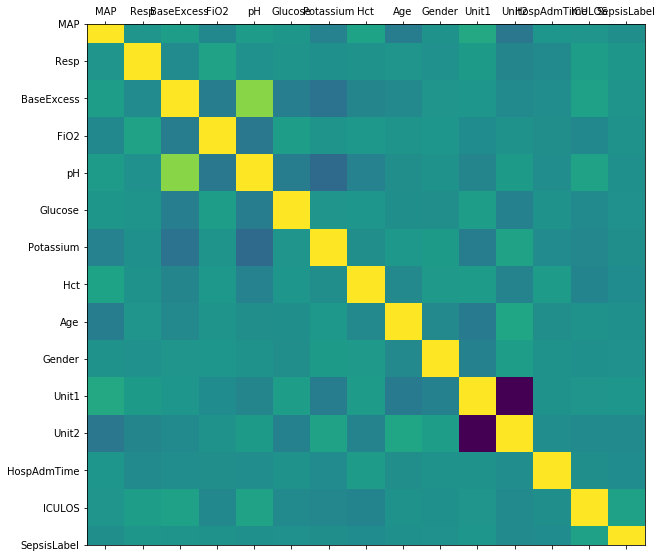

In [47]:
x=plot_corr(df,10)

In [45]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [84]:

y=df['Bilirubin_direct'].values
X=df['Bilirubin_total'].values





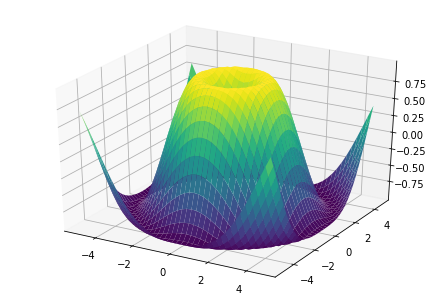

In [85]:

X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

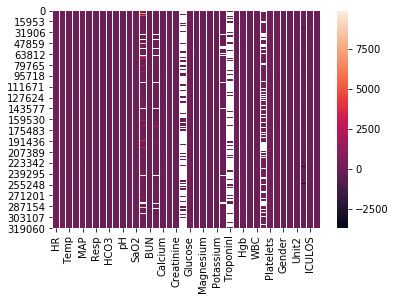

In [24]:
sns.heatmap(df)

In [27]:

#pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10))
#plt.show()

In [32]:
import pingouin as pg

In [49]:
corr=df.corr().SepsisLabel

In [50]:
df_corr=pd.DataFrame(corr)

In [51]:
df_corr.head()

,SepsisLabel
MAP,-0.003563
Resp,0.057225
EtCO2,NaN
BaseExcess,0.034737
HCO3,-0.001390


In [52]:
df_corr.sort_values(ascending=False,by="SepsisLabel")

,SepsisLabel
SepsisLabel,1.000000
ICULOS,0.145204
Bilirubin_direct,0.101815
Bilirubin_total,0.061783
Fibrinogen,0.058971
Resp,0.057225
Unit1,0.053831
BUN,0.044329
WBC,0.042430
BaseExcess,0.034737


In [46]:
df=pd.get_dummies(df)


In [47]:
df.head()

,MAP,Resp,BaseExcess,FiO2,pH,Glucose,Potassium,Hct,Age,Gender,...,sansein_kharabh,sansein_ptanhi,sansein_sahi,umar_jawani,umar_naman,bp_above normal,bp_high,bp_low,bp_normal,bp_ptanhi
0,75.33,19.0,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,...,0,0,1,0,1,0,0,0,0,1
1,86.00,22.0,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,...,1,0,0,0,1,0,0,0,0,1
2,NaN,30.0,24.0,NaN,7.36,NaN,NaN,NaN,83.14,0,...,1,0,0,0,1,0,0,0,0,1
3,91.33,24.5,NaN,0.28,NaN,NaN,NaN,NaN,83.14,0,...,1,0,0,0,1,0,0,0,0,1
4,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,...,1,0,0,0,1,0,0,0,0,1


In [48]:
df.drop('Resp',axis=1,inplace=True)


In [49]:
df.columns

Index(['MAP', 'BaseExcess', 'FiO2', 'pH', 'Glucose', 'Potassium', 'Hct', 'Age',
       'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel',
       'tapmaan_kharabh', 'tapmaan_ptanhi', 'dhadhkan_kharabh',
       'dhadhkan_ptanhi', 'dhadhkan_sahi', 'o2stat_kharabh', 'o2stat_ptanhi',
       'o2stat_sahi', 'sansein_kharabh', 'sansein_ptanhi', 'sansein_sahi',
       'umar_jawani', 'umar_naman', 'bp_above normal', 'bp_high', 'bp_low',
       'bp_normal', 'bp_ptanhi'],
      dtype='object')

In [50]:
df.drop('Age',axis=1,inplace=True)
df.drop('dhadhkan_ptanhi',axis=1,inplace=True)
df.drop('o2stat_ptanhi',axis=1,inplace=True)
df.drop('sansein_ptanhi',axis=1,inplace=True)
df.drop('bp_ptanhi',axis=1,inplace=True)
df.drop('umar_jawani',axis=1,inplace=True)


In [51]:
df.head()

,MAP,BaseExcess,FiO2,pH,Glucose,Potassium,Hct,Gender,Unit1,Unit2,...,dhadhkan_sahi,o2stat_kharabh,o2stat_sahi,sansein_kharabh,sansein_sahi,umar_naman,bp_above normal,bp_high,bp_low,bp_normal
0,75.33,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,1,0,1,0,1,1,0,0,0,0
1,86.00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,1,0,1,1,0,1,0,0,0,0
2,NaN,24.0,NaN,7.36,NaN,NaN,NaN,0,NaN,NaN,...,1,0,1,1,0,1,0,0,0,0
3,91.33,NaN,0.28,NaN,NaN,NaN,NaN,0,NaN,NaN,...,0,1,0,1,0,1,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,0,0,1,1,0,1,0,0,0,0


In [52]:
df.columns

Index(['MAP', 'BaseExcess', 'FiO2', 'pH', 'Glucose', 'Potassium', 'Hct',
       'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel',
       'tapmaan_kharabh', 'tapmaan_ptanhi', 'dhadhkan_kharabh',
       'dhadhkan_sahi', 'o2stat_kharabh', 'o2stat_sahi', 'sansein_kharabh',
       'sansein_sahi', 'umar_naman', 'bp_above normal', 'bp_high', 'bp_low',
       'bp_normal'],
      dtype='object')

In [53]:
X_int=df.drop('SepsisLabel',axis=1).values
Y_int=df['SepsisLabel'].values

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_int,Y_int, test_size=0.2,random_state=42)

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer 
steps = [ ('imp', Imputer(missing_values="NaN",strategy="mean",axis=0)),
          ('clf', xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000, seed=1))]



pipeline = Pipeline(steps)


pipeline.fit(X_train, y_train)
pipeline.predict(X_test)
pipeline.score(X_test, y_test)

C:\Users\Abhishek Parashar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


0.9800453717799469